In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def signal(k, a, b):
    return np.exp(-k*(a + 1j*b))

In [3]:
# the goal is to estimate $a$ and $b$ from the signal with binomial noise

def sample_signal(k, a, b, n):
    p_real = (1 - signal(k, a, b).real) / 2
    p_imag =(1 - signal(k, a, b).imag) / 2
    count_real = np.random.binomial(n, p_real)
    count_imag = np.random.binomial(n, p_imag)
    phat_real = count_real / n
    phat_imag = count_imag / n
    sampled_signal = (1 - 2*phat_real) + 1j*(1 - 2*phat_imag)
    return sampled_signal

In [4]:
def plot_signal_on_circle(signal, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    # use a colorbar to show the index
    reals = np.real(signal)
    imags = np.imag(signal)
    ax.scatter(reals, imags, c=np.arange(len(reals)), cmap='viridis')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    # add a colorbar
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.set_label('Index')
    # plot the unit circle
    t = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(t), np.sin(t), 'k')
    ax.axis('equal')
    
    

In [5]:
ks = np.arange(100)
a = 0.01
b = 0.1
n = 100
sampled_signal = sample_signal(ks, a, b, n)
true_signal = signal(ks, a, b)

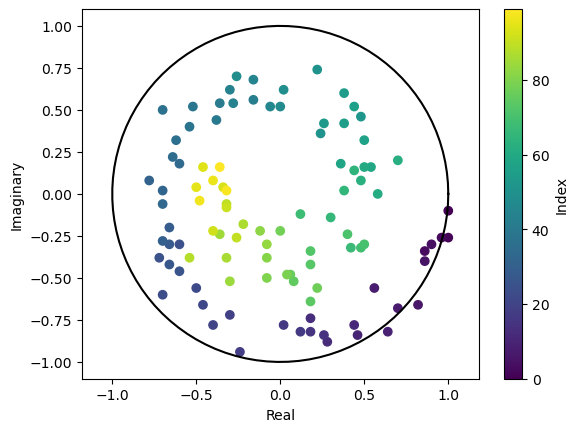

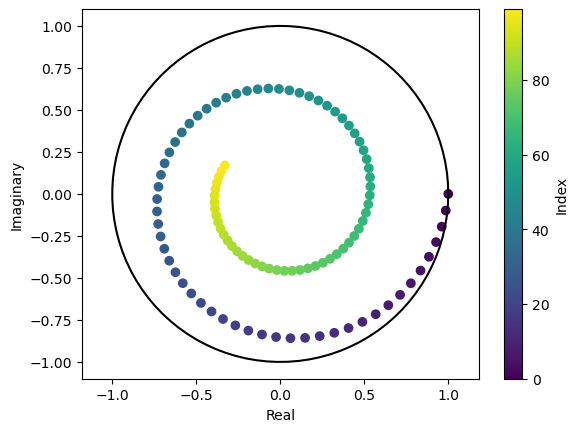

In [6]:
plot_signal_on_circle(sampled_signal)
plot_signal_on_circle(true_signal)